<a href="https://colab.research.google.com/github/jatmdm/dgg-badwords/blob/master/dgg_bad_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D.GG BAD WORD ANALYZER

Made by TheDJ from d.gg

Summary:
Python script that grabs logs from overrustlelogs and counts the mean, nasty words you say.

Cancel your favorite chatter/streamer!

NOTICE:
Some people (*cough* Dan *cough*) have deleted their logs (I wonder why PEPE), so data on them is faulty.

Instructions:
- Make sure you're in playground mode (click "open in playground in top left corner")
- You must be logged into your google account to use Colaboratory.
- Click "Connect" in the top right corner
- You may get a popup saying "Google didn't make this script". Click "Run Anyways"
- Type the desired username in "user"
- Click "Runtime -> Run All" or Ctrl+F9
- Have fun!

DM me on twitter or hit me up in d.gg if shits broken.

Twitter: https://twitter.com/jatmdm

In [0]:
user = "moofish" #@param {type:"string"}

In [0]:
from datetime import datetime
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express
import collections
import random

In [0]:

base_url = 'https://dgg.overrustlelogs.net/Destinygg%20chatlog/'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
req_urls = []

In [0]:
bad_words = {'nigger': '#ff0000', 'coon':'#af0404', 'fag': '#a0c334', 'faggot' : '#66CD00', 'retard': '#007065', 'kike':'#512c96', 'chink':'#70416d', 'gook':'#8d448b'}

In [0]:
for y in years:
  for m in months:
    req_urls.append( (m + str(y), base_url + m + '%20' + str(y) + '/userlogs/' + user + '.txt') )

In [0]:
raw_text = ""
for url in req_urls:
  r = requests.get(url[1])
  if r.text[0] is '[': 
    raw_text += r.text
#   print(r.text)

In [0]:
raw_logs = raw_text.split('\n')
raw_logs.remove('')

In [133]:
nsfw_datetime = dict()
for log in raw_logs:
  temp_date = datetime.strptime(log[1:20], '%Y-%m-%d %H:%M:%S').date()
  dt = datetime(temp_date.year, temp_date.month, 1)
  text = log[27 + len(user):]
  for bw in bad_words.keys():
    if " " + bw + " " in text.lower():
      print(log)
      if dt not in nsfw_datetime:
        nsfw_datetime[dt] = dict()
        for word in bad_words:
          nsfw_datetime[dt][word] = 0
        nsfw_datetime[dt][bw] = 1
      else:
        temp = nsfw_datetime[dt][bw]
        temp += 1
        nsfw_datetime[dt][bw] = temp
  

[2016-03-29 04:05:45 UTC] MooFish: GrundleBundle no not the faggot king the shadow LUL
[2016-03-29 06:03:18 UTC] MooFish: DESTINY PRESS MY LINK YOU FAGGOT OverRustle https://www.youtube.com/watch?v=_li_d_YviZ4 sfw
[2016-03-29 09:01:27 UTC] MooFish: Thatjordguy What a faggot LUL
[2016-03-31 08:43:27 UTC] MooFish: DeusEsca die retard NoTears
[2016-04-01 09:43:28 UTC] MooFish: ShawarmaFury have fun faggot NoTears
[2016-04-01 10:11:29 UTC] MooFish: _anon$ don't be a faggot destiny wouldn't mean it Kappa
[2016-04-02 04:29:34 UTC] MooFish: > GET ON SKYPE > GO FULL RETARD NoTears
[2016-04-02 04:30:56 UTC] MooFish: ricecraker the retard style? LUL BASEDWATM8
[2016-04-04 08:10:11 UTC] MooFish: Bouzer LUL i don't blame him. faggot dick riders/ghosting OhKrappa
[2016-04-05 09:20:28 UTC] MooFish: DerFaba i didn't say any of that you deranged retard LUL OhKrappa
[2016-04-05 09:31:04 UTC] MooFish: RlPINPEACE LUL which religion supports the US destroying iraq and propping up dictators in the middle e

In [0]:
x = []
# y = []
y = dict()
for xi, yi in nsfw_datetime.items():
  x.append(xi)
  # y.append(yi)
  for word in yi:
    if word not in y:
      y[word] = np.array([])
    y[word] = np.append(y[word], yi[word])

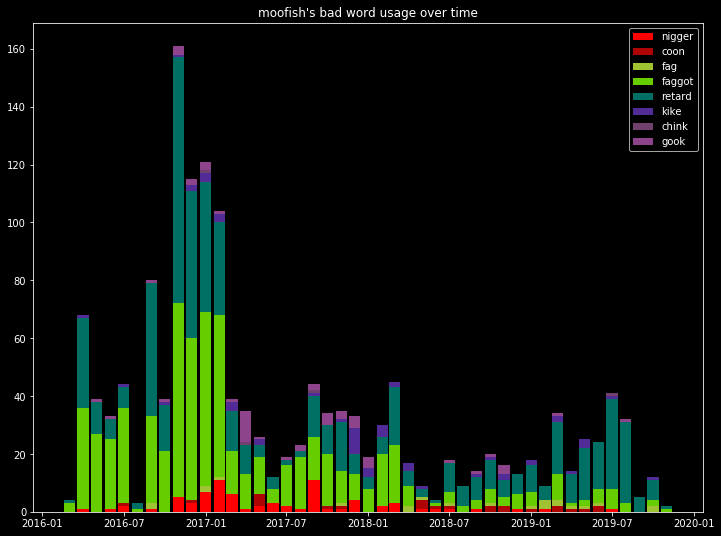

In [135]:
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9

plt.title(user + "'s bad word usage over time")
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = fig_size

bars = []
btm = 0


for word in bad_words.keys():
    bars.append(plt.bar(x, y[word], width=25, alpha=1, label=word, color=bad_words[word], bottom=btm))
    btm += y[word]

plt.legend(bars, bad_words.keys())

plt.show()

In [136]:
bars = []

for word in bad_words.keys():
    bars.append(go.Bar(name=word, x=x, y=y[word]))

fig = go.Figure(data=bars,
                layout=go.Layout(title=user + "'s bad word usage over time")
                )

fig.update_layout(barmode='stack', template='plotly_dark')
fig.show()